 #  introduction
**  Stroke is one of the most serious health problems worldwide and a leading cause of death and disability******

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXPPX4JDPfzzwDVuommp6FqgA1WgZjtTuh_gKxG6YBt7j68kOXsgcZGBgXlzLG9dvIimg&usqp=CAU)

# Information
# 
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [95]:
df.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [96]:
df.drop('id',axis=1,inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [98]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [99]:
df['bmi'].fillna(value=30,inplace=True)

In [100]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [101]:
df['smoking_status'].nunique

<bound method IndexOpsMixin.nunique of 0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object>

In [102]:
def j(k):
    if k=="Female" or k=="No" or k=="Private" or k== "Urban" or k=="never smoked":
        return 0
    elif k=="Male" or k=="Yes" or k=="Self-employed" or k== "Rural" or k=="formerly smoked" or k=="Unknown":
        return 1
    elif k=="Govt_job" or k=="smokes":
        return 2
    elif k=="children":
        return 3
    

In [103]:

df['ever_married']=df['ever_married'].apply(j)
df['gender']=df['gender'].apply(j)
df['work_type']=df['work_type'].apply(j)
df['Residence_type']=df['Residence_type'].apply(j)
df['smoking_status']=df['smoking_status'].apply(j)


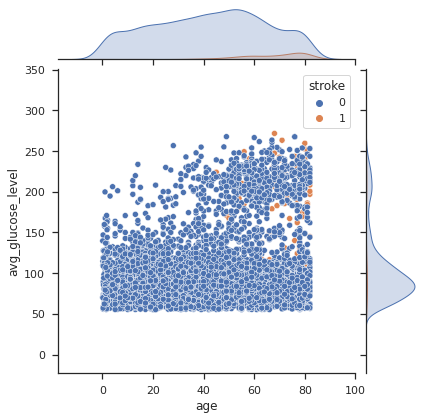

In [104]:
sns.jointplot(data=df, x="age", y="avg_glucose_level", hue="stroke")


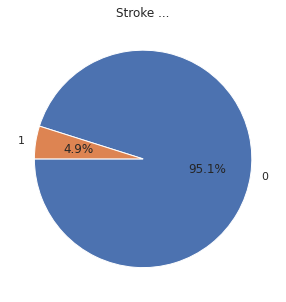

In [128]:
plt.figure(figsize=(10,5))
plt.title("Stroke ...")
g = plt.pie(df.stroke.value_counts(), labels=df.stroke.value_counts().index,autopct='%1.1f%%', startangle=180)

plt.show()

![](http://)**check correlation between features**

Now, let's check correlation between features.


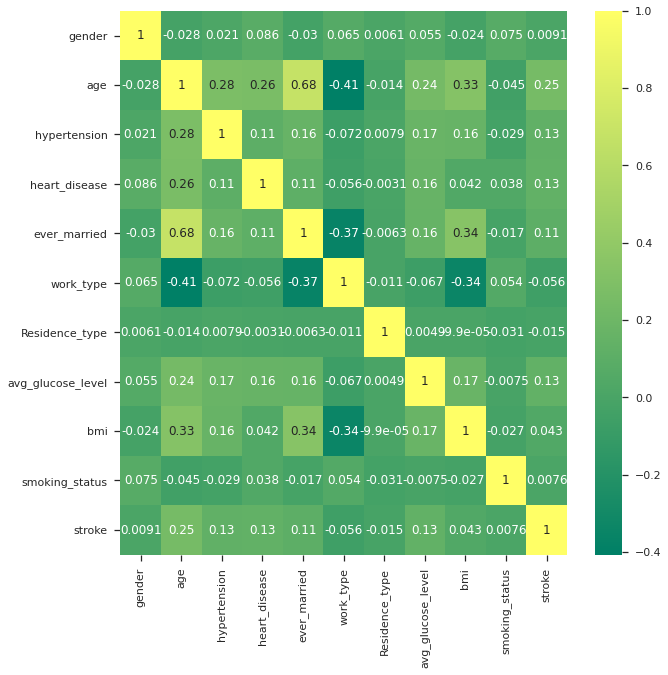

In [105]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='summer');

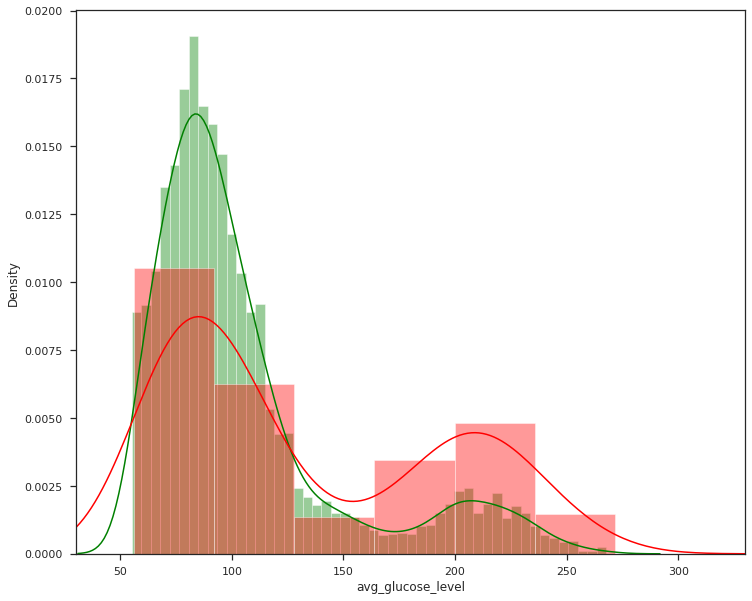

In [129]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red
plt.xlim([30,330])
plt.show()

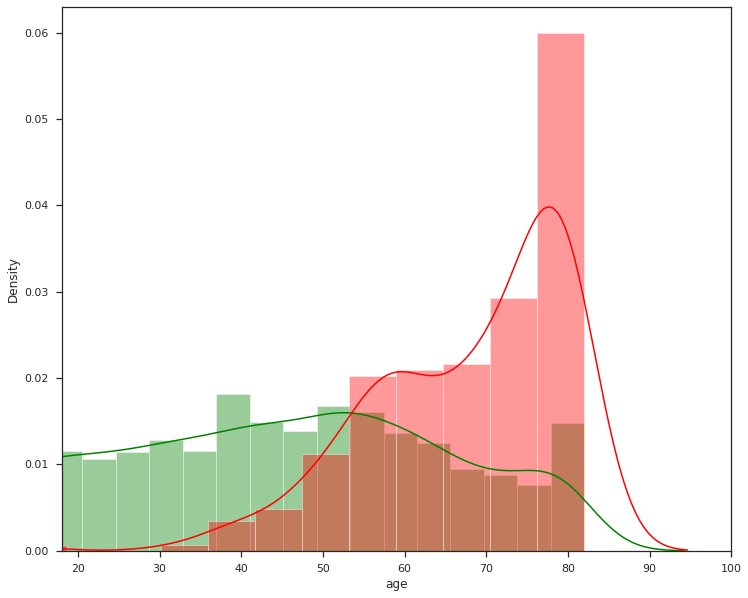

In [130]:

plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["age"], color='red') # Stroke - Red
plt.xlim([18,100])
plt.show()

<AxesSubplot:xlabel='bmi'>

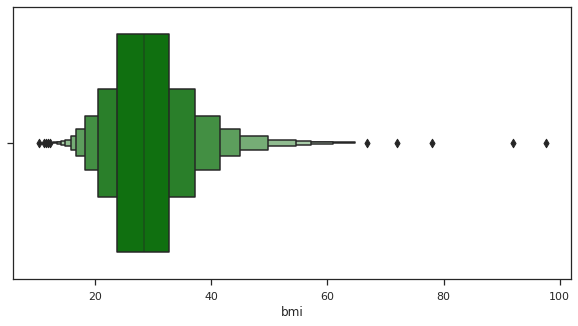

In [108]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='bmi',data=df, color = 'Green')


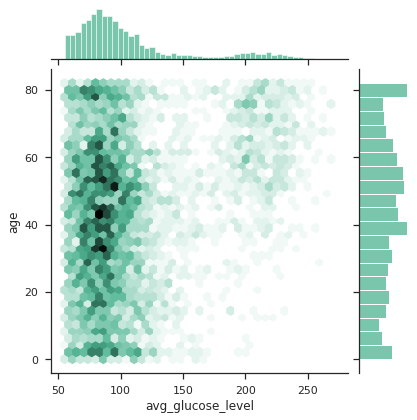

In [109]:
sns.set_theme(style="ticks")


sns.jointplot(x=df['avg_glucose_level'], y=df['age'], kind="hex", color="#4CB391")

In [110]:
df.fillna(value=0,inplace=True)

In [111]:
X =df.drop('stroke',axis=1).values
Y=df['stroke'].values

In [113]:
from sklearn.model_selection import train_test_split

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   float64
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 439.3 KB


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

GaussianNB
Train score of trained model: 87.52556237218813
Validation score of trained model: 85.05338078291815
Test score of trained model: 87.20379146919431
 
Confussion Matrix: 
[[721  28]
 [ 80  15]]

Accuracy : 87.20379146919431
Precision: 34.883720930232556
Recall   : 15.789473684210526
F1 score : 0.21739130434782608
Specificity : 0.9626168224299065

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       749
           1       0.35      0.16      0.22        95

    accuracy                           0.87       844
   macro avg       0.62      0.56      0.57       844
weighted avg       0.84      0.87      0.85       844



-------------------------------------------


MultinomialNB
Train score of trained model: 83.58165352030382
Validation score of trained model: 81.61328588374852
Test score of trained model: 83.88625592417061
 
Confussion Matrix: 
[[691  26]
 [110  17]]

Accuracy : 83.88625592417061
Preci

XGBClassifier
Train score of trained model: 99.82471516213847
Validation score of trained model: 93.59430604982207
Test score of trained model: 94.43127962085308
 
Confussion Matrix: 
[[793  39]
 [  8   4]]

Accuracy : 94.43127962085308
Precision: 9.30232558139535
Recall   : 33.33333333333333
F1 score : 0.14545454545454545
Specificity : 0.953125

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       832
           1       0.09      0.33      0.15        12

    accuracy                           0.94       844
   macro avg       0.54      0.64      0.56       844
weighted avg       0.98      0.94      0.96       844



-------------------------------------------




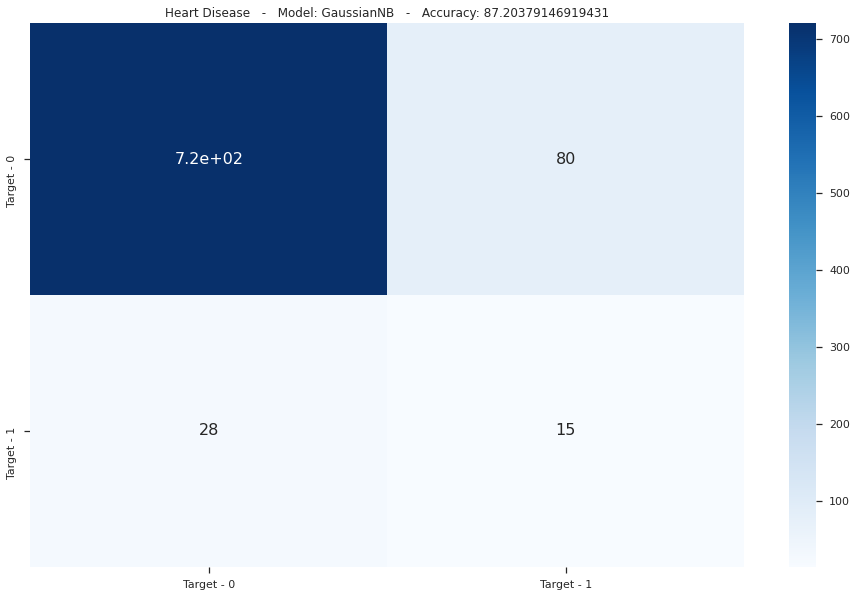

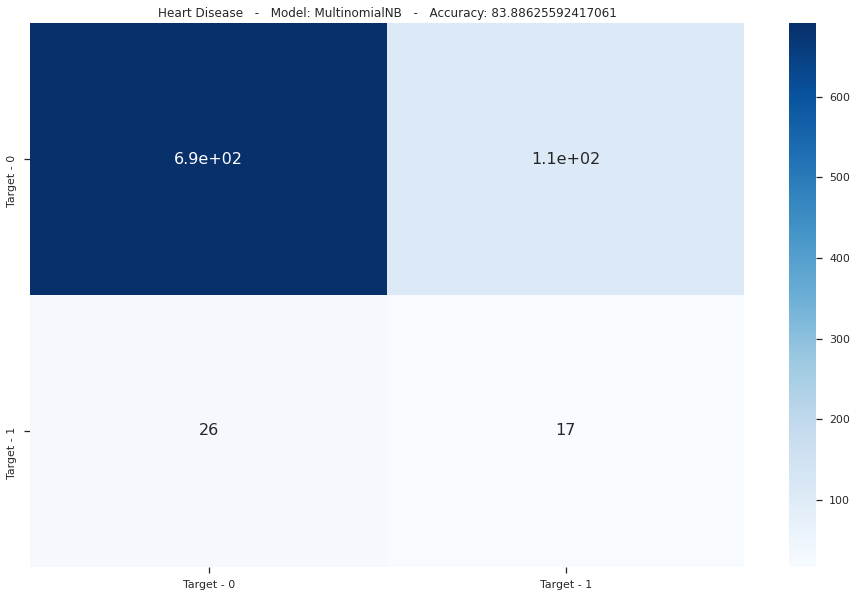

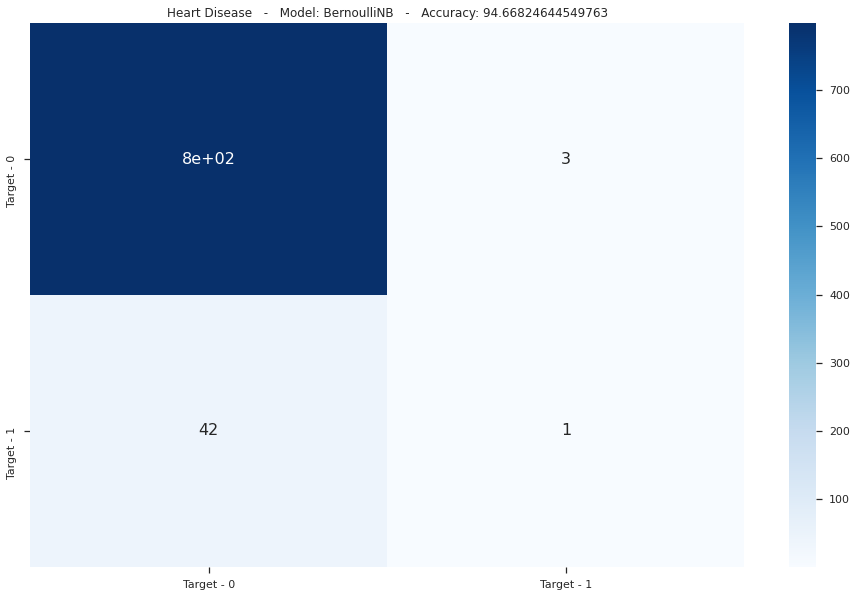

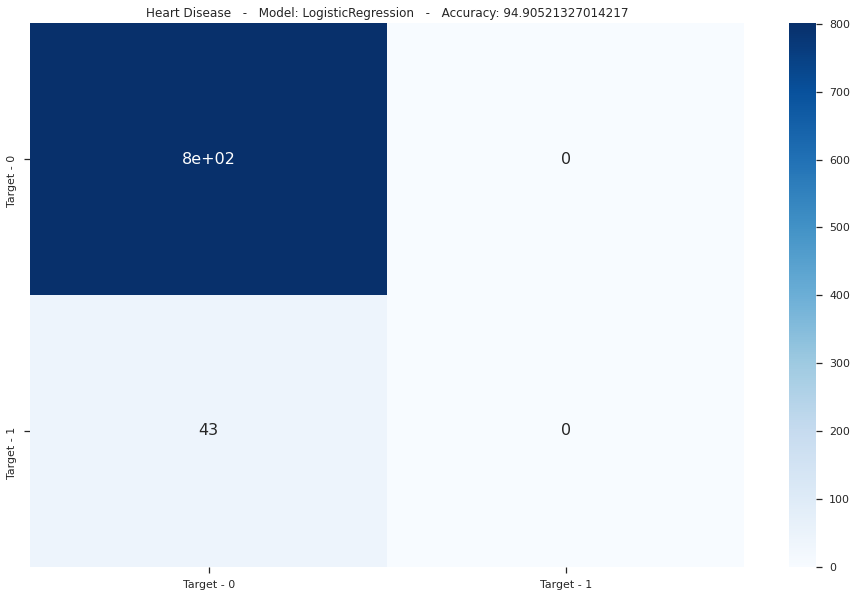

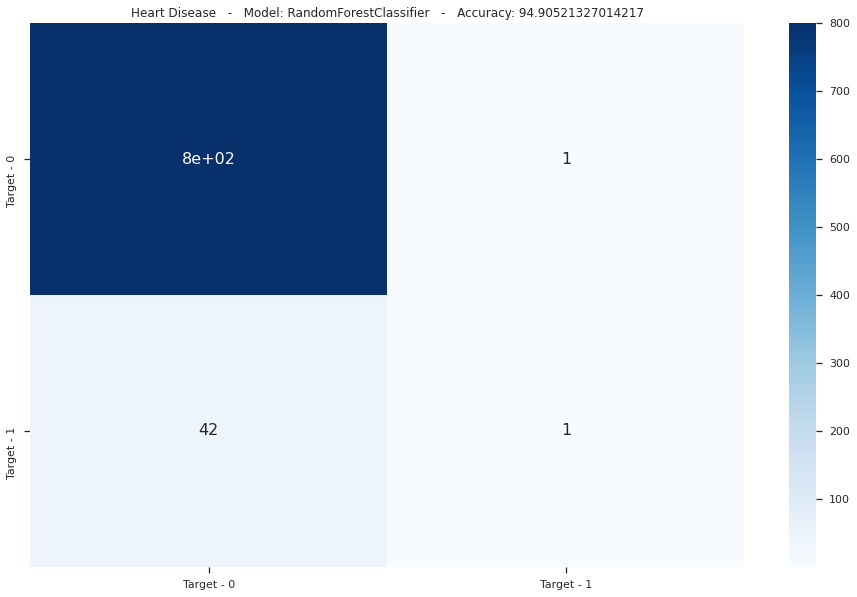

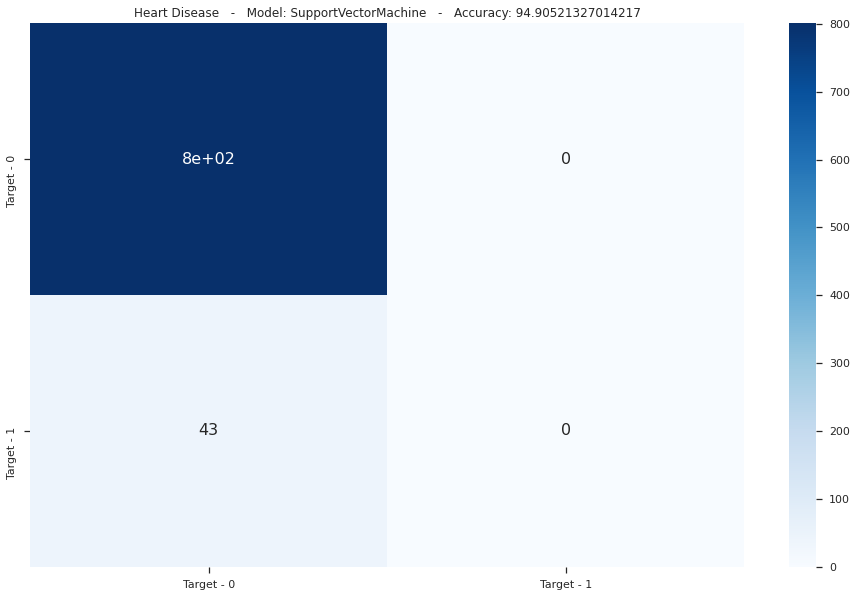

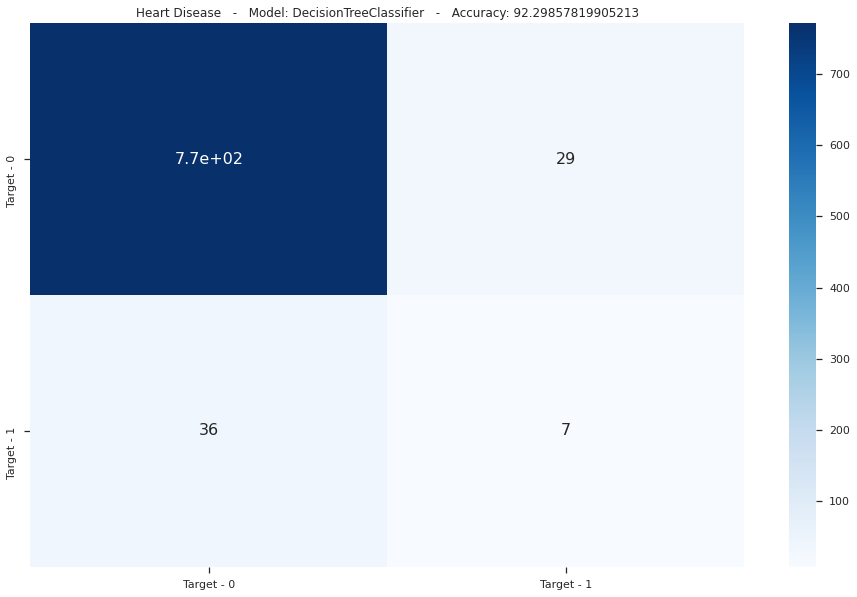

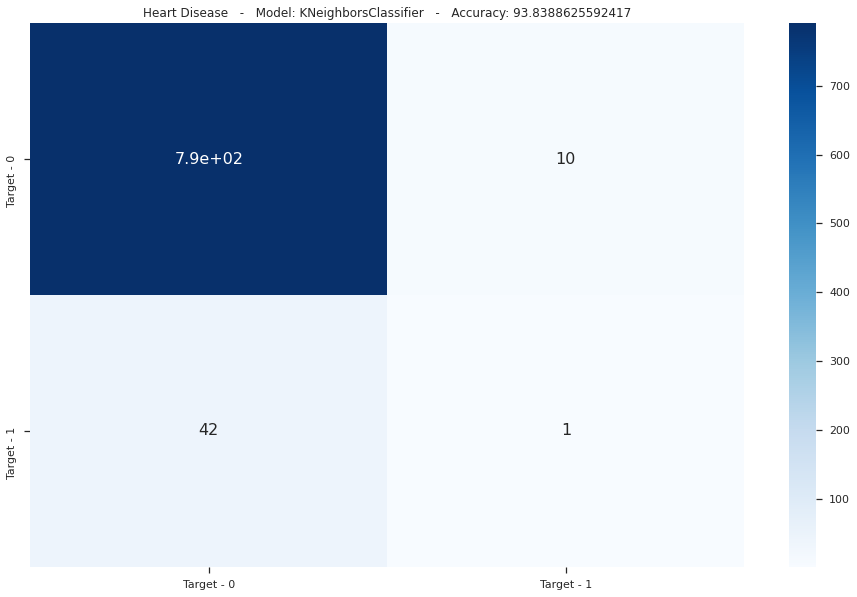

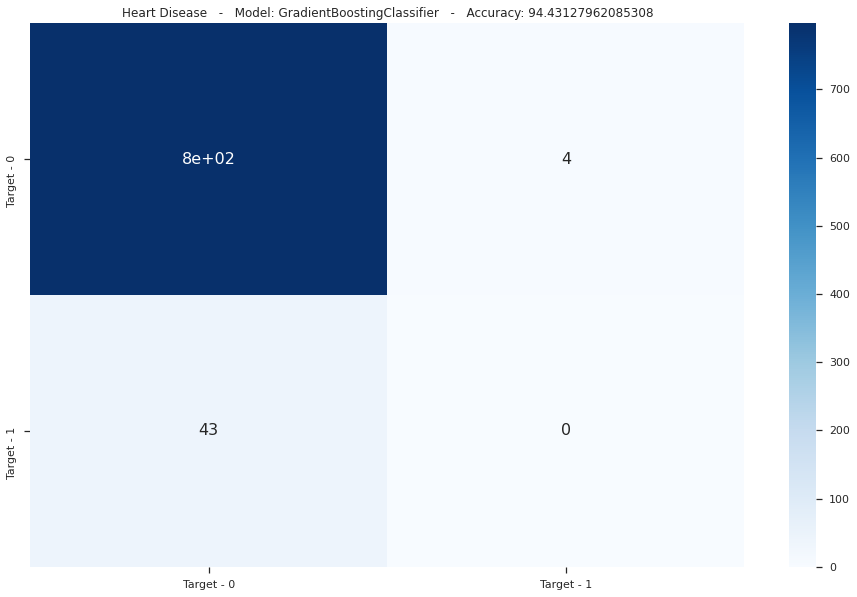

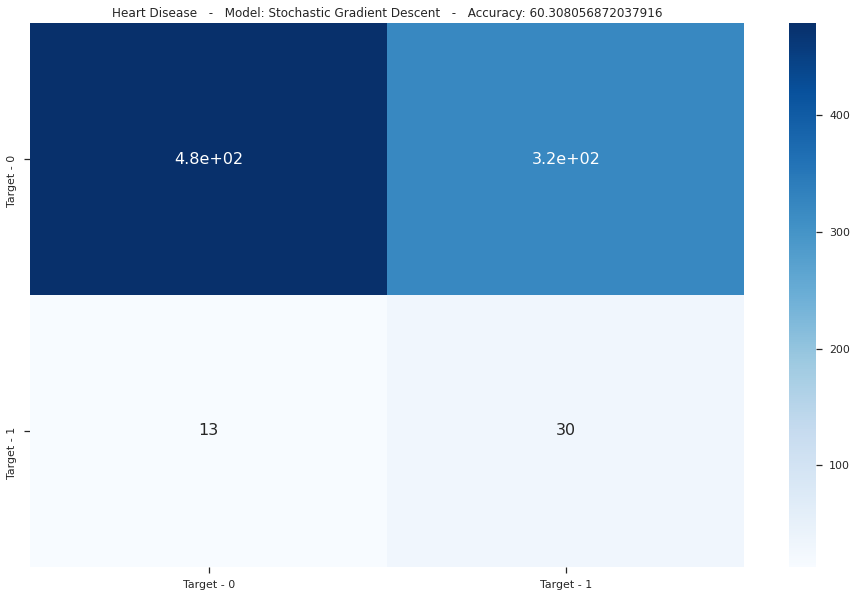

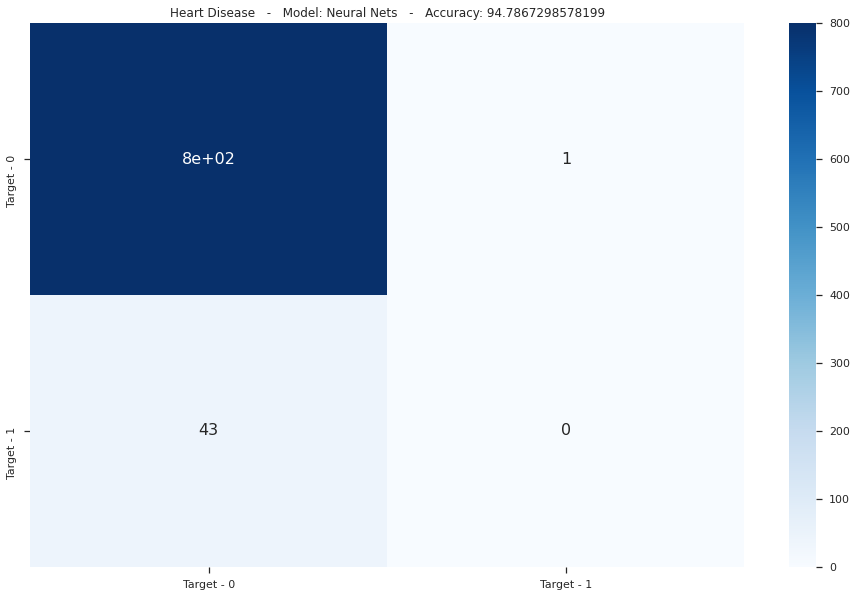

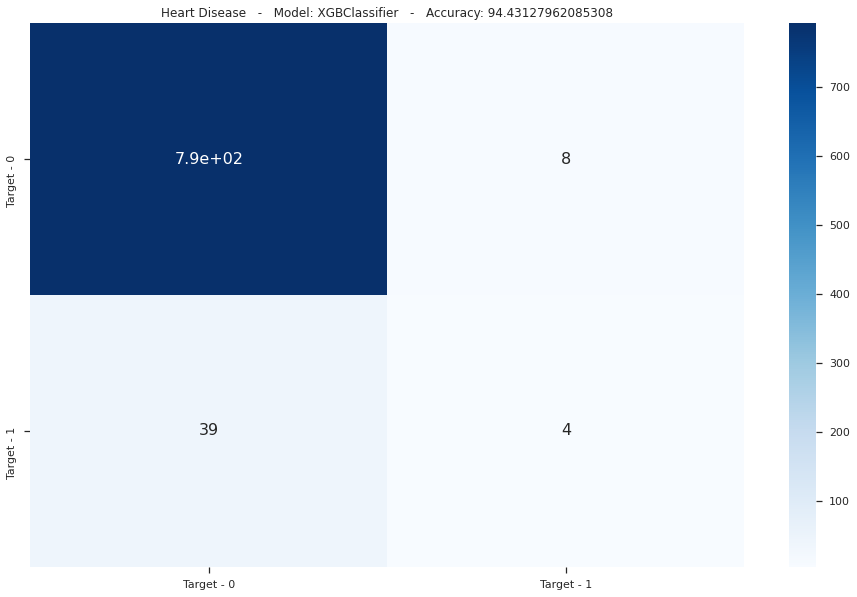

In [115]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    
    
    print(f'{m}') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)
  
    validation_score = model.score(X_valid, y_valid)
    print(f'Validation score of trained model: {validation_score*100}')
    validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")
    
    y_predictions = model.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)

    print(f'Confussion Matrix: \n{conf_matrix}\n')

    predictions = model.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
  
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy*100}')
    print(f'Precision: {precision*100}')
    print(f'Recall   : {recall*100}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
    print("")
   
    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    plt.figure(figsize = (16,10))
    plt.title(f'Heart Disease   -   Model: {current}   -   Accuracy: {test_score*100}')
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
              xticklabels = ['Target - 0', 'Target - 1'],
             yticklabels=['Target - 0', 'Target - 1']);
  
    print("-------------------------------------------")
    print("")
    print("")
    
    

# **The best algorithms for this data are**
**1 - LogisticRegression
2 - RandomForestClassifier 
3 - SupportVectorMachine**